<a href="https://colab.research.google.com/github/vishakhaghete16/Python/blob/main/russiantweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
troll = pd.read_csv('tweets.csv')

In [ ]:
troll.head(5)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN


In [ ]:
troll.dtypes

,0
user_id,float64
user_key,object
created_at,float64
created_str,object
retweet_count,float64
retweeted,object
favorite_count,float64
text,object
tweet_id,float64
source,object


In [ ]:

troll.isnull().sum().sort_values(ascending=False)

,0
in_reply_to_status_id,202923
retweeted_status_id,163831
retweet_count,145399
retweeted,145399
favorite_count,145399
source,145398
user_id,8065
tweet_id,2314
created_at,21
created_str,21


In [ ]:
troll.columns

Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'source', 'hashtags',
       'expanded_urls', 'posted', 'mentions', 'retweeted_status_id',
       'in_reply_to_status_id'],
      dtype='object')

In [ ]:
troll['created_str'] = pd.to_datetime(troll['created_str'])

In [ ]:
troll['created_str'].dtype

dtype('<M8[ns]')

In [ ]:
# Find period of tweets this data caputres
# understand trend of tweet count by date...

In [ ]:
troll['created_str'].min()

Timestamp('2014-07-14 18:04:55')

In [ ]:
troll['created_str'].max()

Timestamp('2017-09-26 09:05:32')

In [ ]:
troll['created_str_date']=troll['created_str'].dt.date

In [ ]:
troll['created_str_date']

,created_str_date
0,2016-03-22
1,2016-10-10
2,2017-02-22
3,2016-12-26
4,2017-08-06
...,...
203477,2016-11-01
203478,2015-06-18
203479,2017-01-10
203480,2016-11-20


In [ ]:
tweet_trend=pd.value_counts(troll['created_str_date']).to_frame()

<ipython-input-16-36e1692160fc>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tweet_trend=pd.value_counts(troll['created_str_date']).to_frame()


In [ ]:
tweet_trend.columns= ['tweet_count']

In [ ]:
tweet_trend.sort_index(ascending=True ,inplace=True)

Text(0, 0.5, 'tweet count')

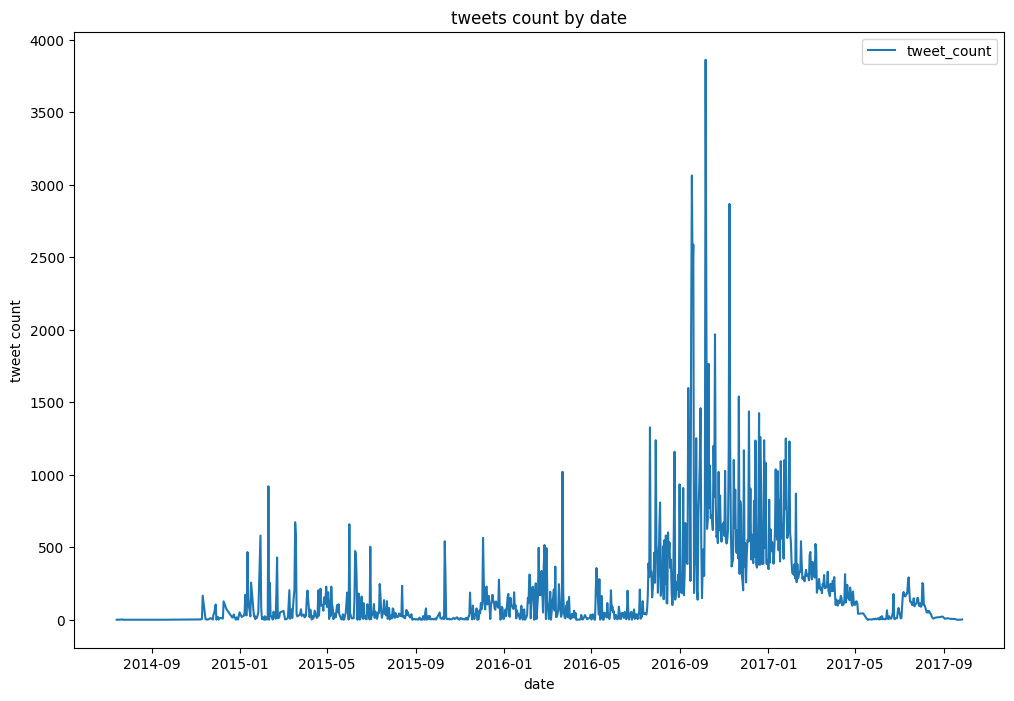

In [ ]:
tweet_trend.plot(figsize=(12,8))
plt.title('tweets count by date')
plt.xlabel('date')
plt.ylabel('tweet count')

In [ ]:
# analyse if these tweet really had to impact the way of the US election or not
# for webscraping there is python library which is beautiful

In [ ]:
dates_list = ['2015-06-16', '2015-12-07', '2016-02-01',
              '2016-03-01', '2016-03-03', '2016-03-11',
              '2016-05-03', '2016-05-26', '2016-06-20',
              '2016-07-15', '2016-07-21', '2016-08-17',
              '2016-09-01', '2016-10-07', '2016-11-08']


In [ ]:
important_dates = pd.Series(dates_list)
important_dates

,0
0,2015-06-16
1,2015-12-07
2,2016-02-01
3,2016-03-01
4,2016-03-03
5,2016-03-11
6,2016-05-03
7,2016-05-26
8,2016-06-20
9,2016-07-15


In [ ]:
data=tweet_trend.copy()

In [ ]:
data

,tweet_count
created_str_date,
2014-07-14,1
2014-07-17,1
2014-07-20,2
2014-07-22,3
2014-07-23,1
...,...
2017-09-10,7
2017-09-16,6
2017-09-19,1


In [ ]:
# add columns to identify important events, and mark  0 or 1.
data['Important Events'] = False

In [ ]:

data.head(3)

,tweet_count,Important Events
created_str_date,,
2014-07-14,1,False
2014-07-17,1,False
2014-07-20,2,False


In [ ]:
values=[False for i in range(930)]
data2['Imp_Events'] = values

NameError: name 'data2' is not defined

In [ ]:
 data2.head(3)

NameError: name 'data2' is not defined

In [ ]:
dt=data.copy()

In [ ]:
data.head(3)

,tweet_count,Important Events
created_str_date,,
2014-07-14,1,False
2014-07-17,1,False
2014-07-20,2,False


In [ ]:
data['Important Events'].unique()

array([False])

In [ ]:
important_dates

,0
0,2015-06-16
1,2015-12-07
2,2016-02-01
3,2016-03-01
4,2016-03-03
5,2016-03-11
6,2016-05-03
7,2016-05-26
8,2016-06-20
9,2016-07-15


In [ ]:
data=data.reset_index().rename(columns={'index':'date'})

In [ ]:
data.head(2)

,created_str_date,tweet_count,Important Events
0,2014-07-14,1,False
1,2014-07-17,1,False


In [ ]:
data.dtypes

,0
created_str_date,object
tweet_count,int64
Important Events,bool


In [ ]:
data['created_str_date'][0]

datetime.date(2014, 7, 14)

In [ ]:
important_dates[0]

'2015-06-16'

In [ ]:
import datetime

In [ ]:
data[data['created_str_date']==datetime.date(2014, 7, 14)]

,created_str_date,tweet_count,Important Events
0,2014-07-14,1,False


In [ ]:
data[data['created_str_date'].isin(dates_list)]


### we are not getting any observations , it means there are some issues with our data..
### lets try to figure out.

,created_str_date,tweet_count,Important Events


In [ ]:
### so it means we have make both series(data['created_str_date'] & important_dates) on same scale
## ie both must be either date-time object or string

## so lets try to convert date-time object into string object using in-built strftime func of date-time module

In [ ]:
### lets try to convert data['date'] into string object..

In [ ]:
import datetime
data['created_str_date']=data['created_str_date'].apply(lambda x:x.strftime('%Y-%m-%d'))


In [ ]:
important_dates[0]

'2015-06-16'

In [ ]:
data['created_str_date'][0]

'2014-07-14'

In [ ]:
data[data['created_str_date'].isin(dates_list)]

,created_str_date,tweet_count,Important Events
170,2015-06-16,3,False
331,2015-12-07,219,False
382,2016-02-01,18,False
409,2016-03-01,143,False
411,2016-03-03,6,False
419,2016-03-11,64,False
467,2016-05-03,38,False
487,2016-05-26,6,False
511,2016-06-20,201,False
536,2016-07-15,47,False


In [ ]:
data['Important Events']=np.where(data['created_str_date'].isin(important_dates),True,False)

In [ ]:
data[data['Important Events']==True]

,created_str_date,tweet_count,Important Events
170,2015-06-16,3,True
331,2015-12-07,219,True
382,2016-02-01,18,True
409,2016-03-01,143,True
411,2016-03-03,6,True
419,2016-03-11,64,True
467,2016-05-03,38,True
487,2016-05-26,6,True
511,2016-06-20,201,True
536,2016-07-15,47,True


In [ ]:
data['Important Events'].unique()

array([False,  True])

In [ ]:
#### 2.using .loc ie (pandas.DataFrame.loc)-->> which is a property of Dataframe

In [ ]:
dt.head(1)

,tweet_count,Important Events
created_str_date,,
2014-07-14,1,False


In [ ]:
dt['Important Events'].unique()

array([False])

In [ ]:
## it means if important dates lies in index of dt dataframe , assgn as True to those observations in Important_events feature..

dt.loc[pd.to_datetime(important_dates), 'Important Events'] = True

In [ ]:
dt[dt['Important Events']==True]

,tweet_count,Important Events
created_str_date,,
2015-06-16,3,True
2015-12-07,219,True
2016-02-01,18,True
2016-03-01,143,True
2016-03-03,6,True
2016-03-11,64,True
2016-05-03,38,True
2016-05-26,6,True
2016-06-20,201,True


# part 2: prepare your data for analysis
# if tweets impact the way of the us election

In [ ]:
data['values']=np.where(data['created_str_date'].isin(important_dates),1,0)

NameError: name 'np' is not defined

In [ ]:
data

,created_str_date,tweet_count,Important Events,values
0,2014-07-14,1,False,0
1,2014-07-17,1,False,0
2,2014-07-20,2,False,0
3,2014-07-22,3,False,0
4,2014-07-23,1,False,0
...,...,...,...,...
925,2017-09-10,7,False,0
926,2017-09-16,6,False,0
927,2017-09-19,1,False,0
928,2017-09-24,1,False,0
